In [1]:
# pip install squarify

In [4]:
# basic 
import pandas as pd 
import numpy as np

# visualization 
import squarify
import plotly.express as px
import seaborn as sns
import matplotlib.pyplot as plt
import folium

import matplotlib as mpl 
mpl.rcParams['axes.unicode_minus'] = False
plt.rc('font',family='Malgun Gothic')

import warnings
warnings.filterwarnings('ignore',category=FutureWarning)

In [5]:
restaurant = pd.read_csv("C:/Users/user/OneDrive/바탕 화면/SESAC-2/HW/HW3/서울특별시_일반음식점.csv",encoding = 'cp949')

C:\Users\user\AppData\Local\Temp\ipykernel_7688\845368381.py:1: DtypeWarning: Columns (22,27,39,41,44,45) have mixed types. Specify dtype option on import or set low_memory=False.
  restaurant = pd.read_csv("C:/Users/user/OneDrive/바탕 화면/SESAC-2/HW/HW3/서울특별시_일반음식점.csv",encoding = 'cp949')


In [6]:
# explore data 

In [7]:
restaurant.head(5)

,번호,개방서비스명,개방서비스아이디,개방자치단체코드,관리번호,인허가일자,인허가취소일자,영업상태구분코드,영업상태명,상세영업상태코드,...,공장생산직종업원수,건물소유구분명,보증액,월세액,다중이용업소여부,시설총규모,전통업소지정번호,전통업소주된음식,홈페이지,Unnamed: 47
0,1,일반음식점,07_24_04_P,3150000,3150000-101-2020-00448,20200803,NaN,1,영업/정상,1,...,NaN,NaN,NaN,NaN,N,35.19,NaN,NaN,NaN,NaN
1,2,일반음식점,07_24_04_P,3150000,3150000-101-2020-00449,20200803,NaN,1,영업/정상,1,...,NaN,NaN,NaN,NaN,N,50.37,NaN,NaN,NaN,NaN
2,3,일반음식점,07_24_04_P,3220000,3220000-101-2020-00851,20200803,NaN,1,영업/정상,1,...,0.0,NaN,0.0,0.0,N,13.65,NaN,NaN,NaN,NaN
3,4,일반음식점,07_24_04_P,3220000,3220000-101-2020-00853,20200803,NaN,1,영업/정상,1,...,NaN,NaN,NaN,NaN,Y,123.30,NaN,NaN,NaN,NaN
4,5,일반음식점,07_24_04_P,3220000,3220000-101-2020-00855,20200803,NaN,1,영업/정상,1,...,NaN,NaN,NaN,NaN,N,8.26,NaN,NaN,NaN,NaN


In [8]:
# restaurant.isnull().sum()

In [9]:
print(restaurant.columns)
print(restaurant.info())
print(restaurant.describe(include="all"))

Index(['번호', '개방서비스명', '개방서비스아이디', '개방자치단체코드', '관리번호', '인허가일자', '인허가취소일자',
       '영업상태구분코드', '영업상태명', '상세영업상태코드', '상세영업상태명', '폐업일자', '휴업시작일자', '휴업종료일자',
       '재개업일자', '소재지전화', '소재지면적', '소재지우편번호', '소재지전체주소', '도로명전체주소', '도로명우편번호',
       '사업장명', '최종수정시점', '데이터갱신구분', '데이터갱신일자', '업태구분명', '좌표정보(x)', '좌표정보(y)',
       '위생업태명', '남성종사자수', '여성종사자수', '영업장주변구분명', '등급구분명', '급수시설구분명', '총종업원수',
       '본사종업원수', '공장사무직종업원수', '공장판매직종업원수', '공장생산직종업원수', '건물소유구분명', '보증액',
       '월세액', '다중이용업소여부', '시설총규모', '전통업소지정번호', '전통업소주된음식', '홈페이지',
       'Unnamed: 47'],
      dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 472915 entries, 0 to 472914
Data columns (total 48 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   번호           472915 non-null  int64  
 1   개방서비스명       472915 non-null  object 
 2   개방서비스아이디     472915 non-null  object 
 3   개방자치단체코드     472915 non-null  int64  
 4   관리번호         472915 non-null  object 
 5   인허가일자     

In [10]:
# data preprocessing

In [11]:
# '소재지전체주소'  결측치제거  
restaurant = restaurant.dropna(subset=['소재지전체주소'])

In [12]:
# 서울특별시의 구와 동을 추출
restaurant['구'] = restaurant['소재지전체주소'].str.extract(r'서울특별시 (\w+구)')
restaurant['동'] = restaurant['소재지전체주소'].str.extract(r'서울특별시 \w+구 (\w+동)')

# 중복된 구와 동 제거
unique_gu_dong = restaurant[['구', '동']].drop_duplicates().reset_index(drop=True)
restaurant.columns

Index(['번호', '개방서비스명', '개방서비스아이디', '개방자치단체코드', '관리번호', '인허가일자', '인허가취소일자',
       '영업상태구분코드', '영업상태명', '상세영업상태코드', '상세영업상태명', '폐업일자', '휴업시작일자', '휴업종료일자',
       '재개업일자', '소재지전화', '소재지면적', '소재지우편번호', '소재지전체주소', '도로명전체주소', '도로명우편번호',
       '사업장명', '최종수정시점', '데이터갱신구분', '데이터갱신일자', '업태구분명', '좌표정보(x)', '좌표정보(y)',
       '위생업태명', '남성종사자수', '여성종사자수', '영업장주변구분명', '등급구분명', '급수시설구분명', '총종업원수',
       '본사종업원수', '공장사무직종업원수', '공장판매직종업원수', '공장생산직종업원수', '건물소유구분명', '보증액',
       '월세액', '다중이용업소여부', '시설총규모', '전통업소지정번호', '전통업소주된음식', '홈페이지',
       'Unnamed: 47', '구', '동'],
      dtype='object')

In [13]:
restaurant['구'].value_counts().reset_index().head(5)

,구,count
0,강남구,44069
1,송파구,26959
2,마포구,24888
3,서초구,24769
4,영등포구,24278


### **MP1 HW**

In [67]:
# 서대문구 치킨집 필터링(호프/통닭, 통닭(치킨))
seodaemun_dong = restaurant[restaurant['구'] == '서대문구']['동'].unique()
chicken = restaurant[(restaurant['구'] == '서대문구') & (restaurant['업태구분명'] == '호프/통닭')]

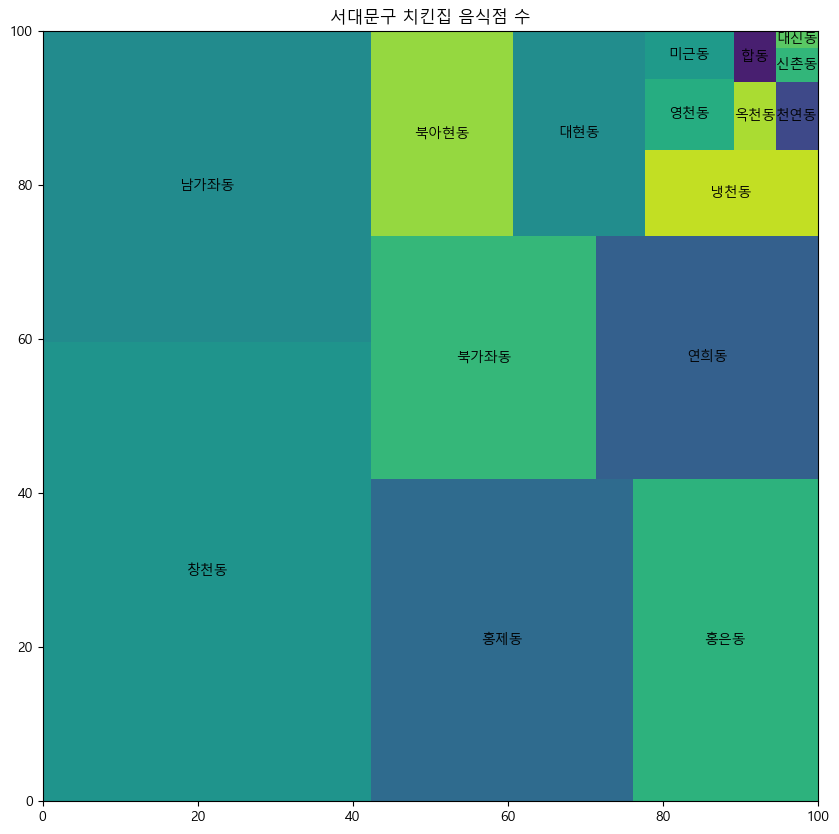

In [68]:
countChicken = chicken['동'].value_counts().reset_index()
countChicken.columns = ['동', '치킨집수']

# treemap 
sizes = countChicken['치킨집수']
label = countChicken['동']
plt.figure(figsize=(10, 10))
squarify.plot(sizes=sizes, label=label)
plt.title('서대문구 치킨집 음식점 수')
plt.show()

### **서대문구 음식점 분포(전체)**

In [75]:
countChicken.reset_index() 
countChicken.columns = ['동', 'count'] 
fig = px.treemap(countChicken, path=['동'], values='count', title='서대문구 음식점 분포') 
fig.show() 

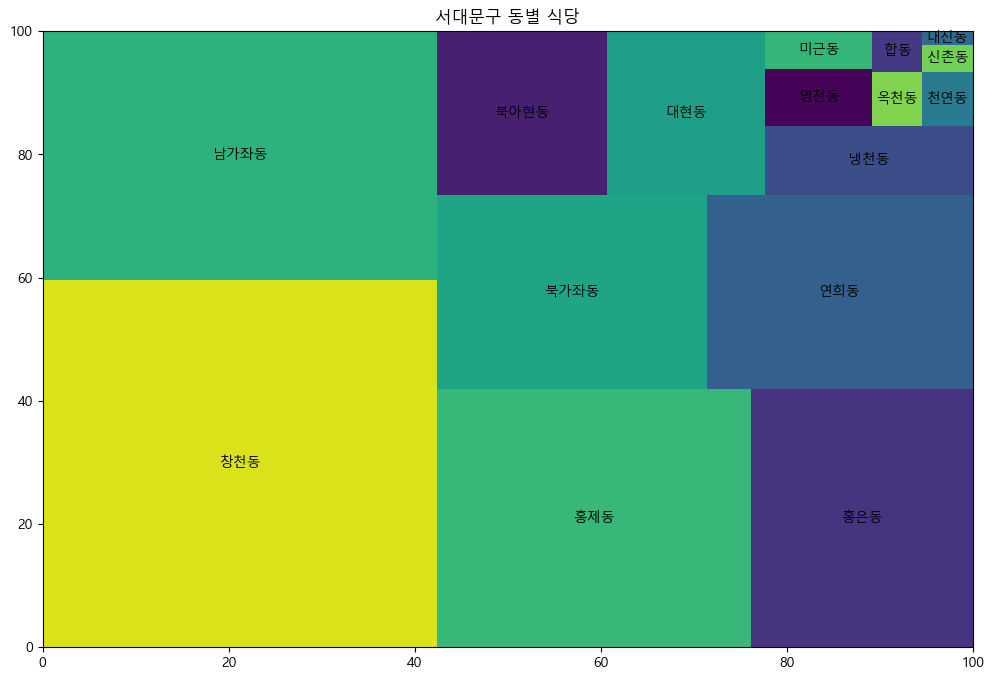

In [77]:
plt.figure(figsize=(12, 8))
squarify.plot(sizes=countChicken['count'], label=countChicken['동'])
plt.title('서대문구 동별 식당')
plt.show()

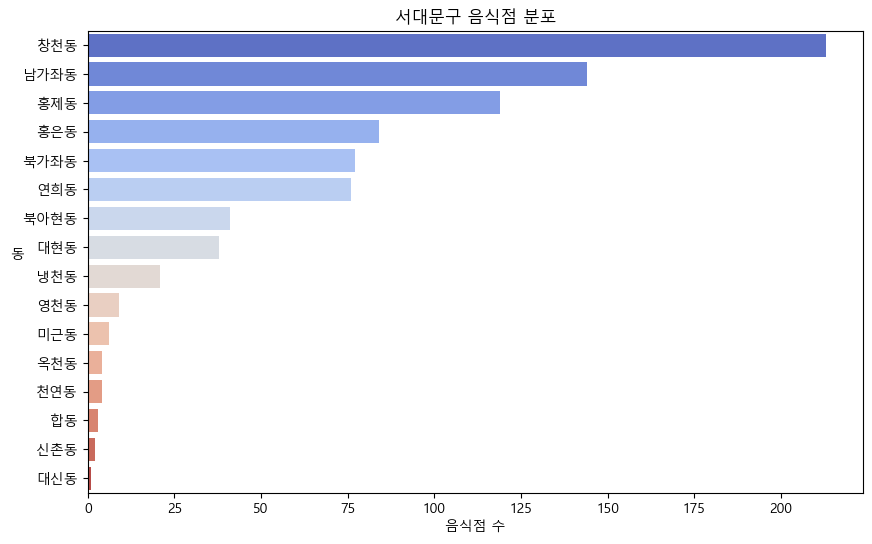

In [78]:
# '서대문구' Bar plot  
plt.figure(figsize=(10, 6))
sns.barplot(data=countChicken, x='count', y='동', palette='coolwarm')
plt.title('서대문구 음식점 분포')
plt.xlabel('음식점 수')
plt.ylabel('동',rotation=0)
plt.show()

In [18]:
# 구별 폐업 비율 

In [19]:
restaurant['영업상태명'].value_counts()

영업상태명
폐업       348554
영업/정상    124124
Name: count, dtype: int64

In [20]:
# 구별 영업 상태별 count 
status_counts = restaurant.groupby(['구', '영업상태명']).size().unstack(fill_value=0)

# 폐업 비율 계산
status_counts['폐업 비율'] = status_counts['폐업'] / (status_counts['영업/정상'] + status_counts['폐업'])

status_counts = status_counts.sort_values(by='폐업 비율', ascending=False).reset_index()

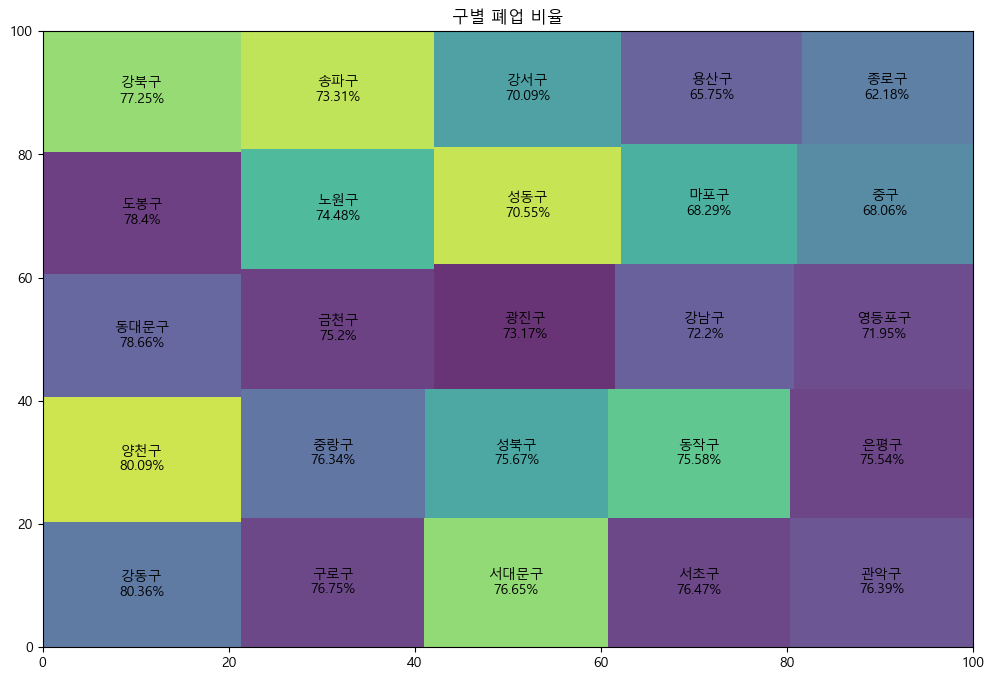

In [21]:
# tree map
sizes = status_counts['폐업 비율']
labels = status_counts['구'] + '\n' + (status_counts['폐업 비율'] * 100).round(2).astype(str) + '%'

plt.figure(figsize=(12, 8))
squarify.plot(sizes=sizes, label=labels, alpha=.8)
plt.title('구별 폐업 비율')
# plt.axis('off')
plt.show()

tree map으로 했는데 눈에 띄는 정보를 얻기 어려움.. 다른 시각화로 다시 확인해보자!<a

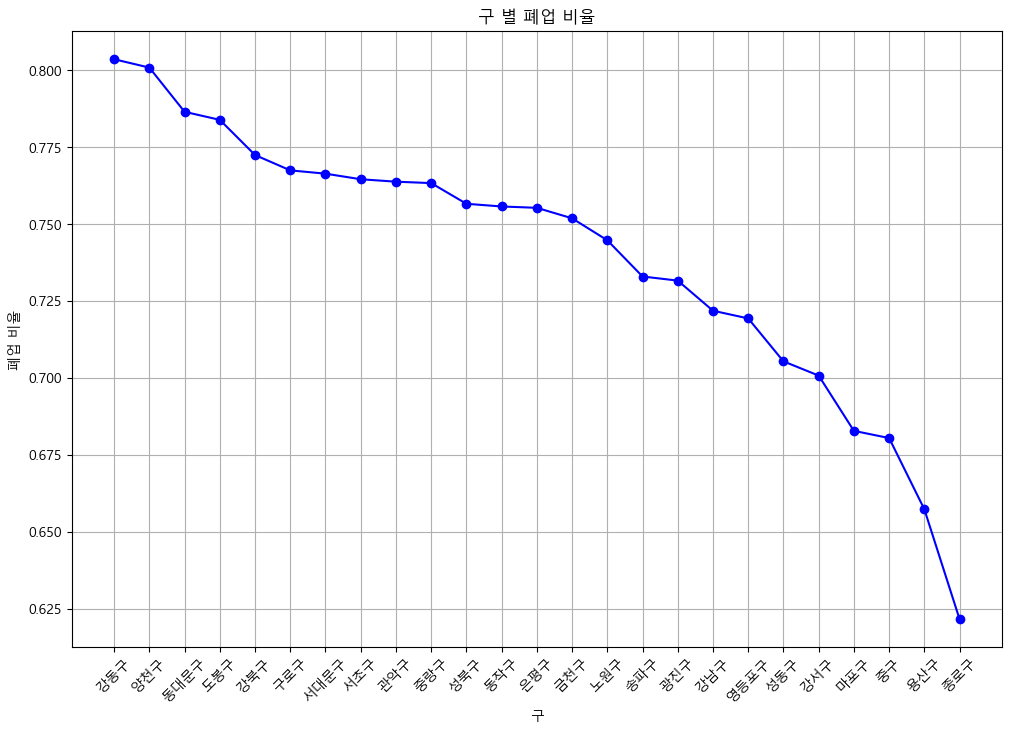

In [22]:
plt.figure(figsize=(12, 8))
plt.plot(status_counts['구'], status_counts['폐업 비율'], marker='o', linestyle='-', color='b')
plt.xlabel('구')
plt.ylabel('폐업 비율')
plt.title('구 별 폐업 비율')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

In [23]:
# 구별 폐업 비율 results

In [24]:
# 연도별 폐업/신규 등록 추이 

In [25]:
restaurant['인허가일자'].value_counts().tail()

인허가일자
19760423    1
19791129    1
19730108    1
19831002    1
19970101    1
Name: count, dtype: int64

In [27]:
# '인허가일자'와 '폐업일자' 컬럼을 datetime 형식으로 변환
restaurant['인허가일자'] = pd.to_datetime(restaurant['인허가일자'])
restaurant['폐업일자'] = pd.to_datetime(restaurant['폐업일자'])

# 연도별로 그룹화하여 신규 등록 및 폐업 개수 계산
restaurant['인허가연도'] = restaurant['인허가일자'].dt.year
restaurant['폐업연도'] = restaurant['폐업일자'].dt.year

new_registrations = restaurant.groupby('인허가연도').size()
closures = restaurant.groupby('폐업연도').size()

In [28]:
# 시계열 분석해보려고 했으나 인허가 일자 모두 1970-01-01로 통일되어있고, 폐업일자(null값이 너무 많음) 유의미한 값 찾기 불가

### **업태 구분명 별 폐업 비율(top10)**

In [30]:
restaurant['업태구분명'].value_counts().reset_index().head(10)

,업태구분명,count
0,한식,199636
1,분식,78686
2,경양식,47856
3,호프/통닭,34910
4,기타,32911
5,일식,17716
6,중국식,14808
7,정종/대포집/소주방,12753
8,통닭(치킨),9547
9,까페,7889


In [31]:
# 업태구분명 별 영업상태명 count
type_counts = restaurant.groupby(['업태구분명', '영업상태명']).size().unstack(fill_value=0)

type_counts['폐업 비율'] = type_counts['폐업'] / (type_counts['영업/정상'] + type_counts['폐업'])

type_counts = type_counts.sort_values(by='폐업 비율', ascending=True).reset_index().head(10)

In [32]:
# type_counts.head(10)

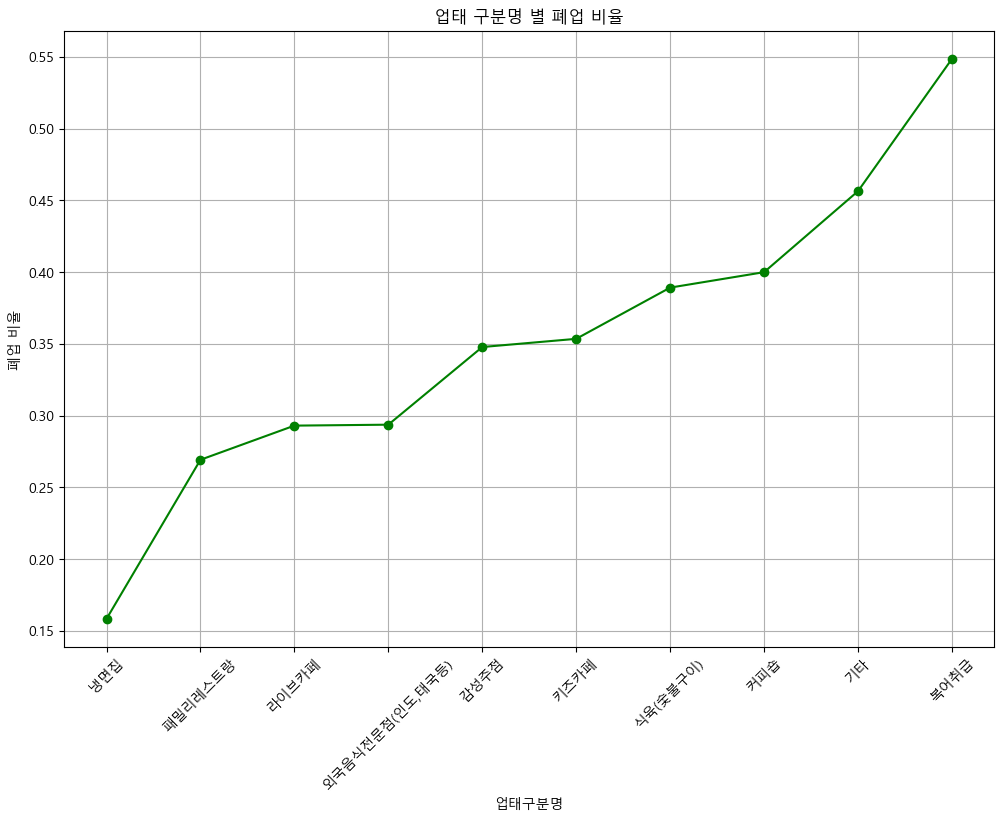

In [33]:
plt.figure(figsize=(12, 8))
plt.plot(type_counts['업태구분명'], type_counts['폐업 비율'], marker='o', linestyle='-', color='g')
plt.xlabel('업태구분명')
plt.ylabel('폐업 비율')
plt.title('업태 구분명 별 폐업 비율')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

### **서울시 음식점 업종 별 시각화**

In [36]:
# (1) 영업 중인 사업장 필터링 
# (2) 업태 구분명의 재 분류(음식점, 주류, 카페) 따라서 지도에 띄운 사업자명(음식점들) 지도에 표시 
# (3) folium 사용하여 지도에 표시

In [37]:
# 영업 중인 사업장 필터링
operating_restaurants = restaurant[restaurant['영업상태명'] == '영업/정상']
operating_restaurants['업태구분명'].value_counts().reset_index().head(10)

,업태구분명,count
0,한식,53356
1,기타,17888
2,호프/통닭,10527
3,경양식,9445
4,분식,9395
5,일식,6201
6,중국식,4626
7,통닭(치킨),2576
8,정종/대포집/소주방,2282
9,까페,2107


In [38]:
operating_restaurants['업태구분명'].unique()

array(['한식', '일식', '분식', '기타', '출장조리', '식육(숯불구이)', '중국식', '경양식', '호프/통닭',
       '까페', '정종/대포집/소주방', '뷔페식', '김밥(도시락)', '통닭(치킨)', '횟집', '패밀리레스트랑',
       '감성주점', '외국음식전문점(인도,태국등)', '라이브카페', '복어취급', '키즈카페', '패스트푸드',
       '탕류(보신용)', '냉면집', '커피숍', nan, '전통찻집', '이동조리'], dtype=object)

In [39]:
operating_restaurants['업태구분명'] = operating_restaurants['업태구분명'].replace('193959.150482967', np.nan)
operating_restaurants.dropna(subset=['업태구분명'], inplace=True)

C:\Users\user\AppData\Local\Temp\ipykernel_7688\4049979106.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  operating_restaurants['업태구분명'] = operating_restaurants['업태구분명'].replace('193959.150482967', np.nan)
C:\Users\user\AppData\Local\Temp\ipykernel_7688\4049979106.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  operating_restaurants.dropna(subset=['업태구분명'], inplace=True)


In [40]:
# 업태구분명 > 종류 : 음식점, 주점, 카페로 구분 
def classify_type(value):
    if value in ['한식', '일식', '분식', '기타', '출장조리', '식육(숯불구이)', '중국식', '경양식',
                 '뷔페식', '김밥(도시락)', '횟집', '패밀리레스트랑', '외국음식전문점(인도,태국등)',
                 '탕류(보신용)', '냉면집', '전통찻집', '일반조리판매', '기타 휴게음식점']:
        return '음식점'
    elif value in ['호프/통닭', '정종/대포집/소주방', '감성주점', '라이브카페', '복어취급', '룸살롱', '간이주점']:
        return '주점'
    elif value in ['까페', '키즈카페', '커피숍', '다방']:
        return '카페'
    else:
        return '기타'

operating_restaurants['종류'] = operating_restaurants['업태구분명'].apply(classify_type)

C:\Users\user\AppData\Local\Temp\ipykernel_7688\1426733634.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  operating_restaurants['종류'] = operating_restaurants['업태구분명'].apply(classify_type)


In [41]:
operating_restaurants['사업장명']

0            혼밥대왕 마곡점
1         꾸어가게생선구이화곡점
2               인생갈비탕
3         놀부 공유주방 선릉역
4                 온기정
             ...     
124203       청년치킨 수유점
124204           포마살롱
124205            우쿠야
124206            한일전
124207           정담초밥
Name: 사업장명, Length: 124113, dtype: object

In [42]:
# 각 종류별 사업장명 리스트로 묶어서 확인해보기  
matched_restaurants = operating_restaurants.groupby('종류')['사업장명'].apply(list).reset_index()

In [43]:
matched_restaurants

,종류,사업장명
0,기타,"[구이마을(두번째), 치르치르, 노랑통닭, 구어조은닭, 짝태 앤 노가리, 페리카나치..."
1,음식점,"[혼밥대왕 마곡점, 꾸어가게생선구이화곡점, 인생갈비탕, 놀부 공유주방 선릉역, 온기..."
2,주점,"[청, 우정식당, 비에이치씨 양평현대점, 짝퉁, 써브웨이 (광화문점), 교촌, 토크..."
3,카페,"[꽃샘, 유토피아 카페, 예스호프, 블루씨티, 갈채, 구할 구, 카밀라, 훔볼트아지..."


In [44]:
print(operating_restaurants['좌표정보(x)'])
print(operating_restaurants['좌표정보(y)'])
# 좌표 정보가 folium에서활용할수없는 형태로 되어있음 변환 해줘야함 

0                   NaN
1         187499.286366
2         204044.789949
3         204603.136055
4         205210.358779
              ...      
124203    201931.867791
124204    201426.990008
124205    202337.752769
124206    203057.772890
124207    204425.164395
Name: 좌표정보(x), Length: 124113, dtype: float64
0                   NaN
1         448069.583478
2         444529.840427
3         444606.621961
4         445154.422252
              ...      
124203     460104.86529
124204    458117.938178
124205    456677.031196
124206    455184.794972
124207    457259.003811
Name: 좌표정보(y), Length: 124113, dtype: object


In [45]:
import folium
from folium.plugins import MarkerCluster
from pyproj import Transformer

In [46]:
# 변환 start
transformer = Transformer.from_crs("EPSG:5181", "EPSG:4326", always_xy=True)

# operating_restaurants의 좌표 변환
operating_restaurants[['경도', '위도']] = operating_restaurants.apply(
    lambda row: pd.Series(transformer.transform(row['좌표정보(x)'], row['좌표정보(y)'])),
    axis=1
)

C:\Users\user\AppData\Local\Temp\ipykernel_7688\3699255107.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  operating_restaurants[['경도', '위도']] = operating_restaurants.apply(
C:\Users\user\AppData\Local\Temp\ipykernel_7688\3699255107.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  operating_restaurants[['경도', '위도']] = operating_restaurants.apply(


In [47]:
# 결측치처리
operating_restaurants_clean = operating_restaurants.dropna(subset=['위도', '경도'])

# 너무 많아서 자꾸 터지길래 data sampling (터짐방지)
sampled_restaurants = operating_restaurants_clean.sample(1000, random_state=42)


In [48]:
seoul_map = folium.Map(location=[37.5665, 126.9780], zoom_start=12)
marker_cluster = MarkerCluster().add_to(seoul_map)

color_map = {
    '음식점': 'green',
    '주점': 'red',
    '카페': 'orange'
}

# 샘플링된 데이터로 Marker 추가
for _, row in sampled_restaurants.iterrows():
    folium.Marker(
        location=[row['위도'], row['경도']],
        popup=row['사업장명'],
         # 기본값은 파란색
        icon=folium.Icon(color=color_map.get(row['종류'], 'blue')) 
    ).add_to(marker_cluster)

In [49]:
# 각 Marker 구분을 위한 legend label 추가해서 보기 편하게 
legend_html = '''
<div style="
    position: fixed; 
    bottom: 50px; left: 50px; width: 150px; height: 110px; 
    background-color: white; z-index:9999; font-size:14px;
    border:1px solid black; padding: 10px;
">
    <b>구분</b><br>
    <i style="background:green; width:10px; height:10px; display:inline-block;"></i> 음식점<br>
    <i style="background:red; width:10px; height:10px; display:inline-block;"></i> 주점<br>
    <i style="background:orange; width:10px; height:10px; display:inline-block;"></i> 카페<br>
</div>
'''
seoul_map.get_root().html.add_child(folium.Element(legend_html))

In [50]:
seoul_map